In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image #PIL = Python Image Library

In [ ]:
img = Image.open('/content/Brain_Scan_Labelled.png')

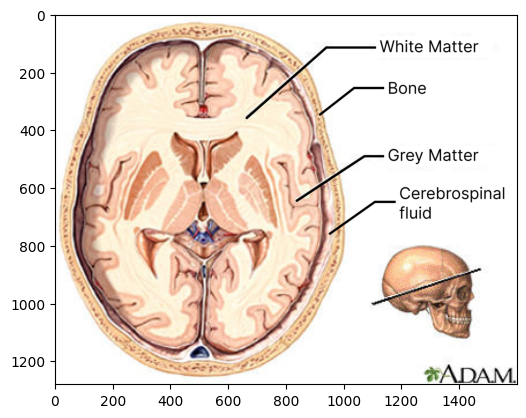

In [ ]:
plt.imshow(img)

In [ ]:
!pip install pydicom

In [ ]:
import pydicom
img = pydicom.dcmread('/content/Vida_Head.MR.Comp_DR-Gain_DR.1005.1.2021.04.27.14.20.13.818.14380335 (1).dcm')

In [ ]:
img_array = img.pixel_array.astype(float)

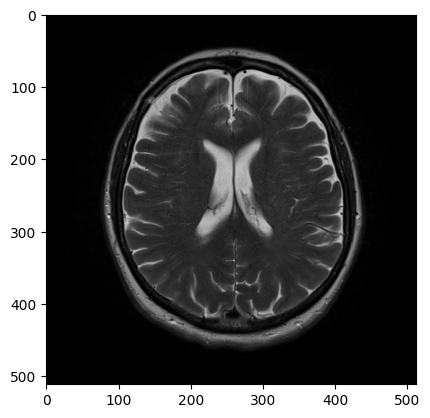

In [ ]:
plt.imshow(img_array, cmap='grey')

In [ ]:
# Scaling
# Min Max Scaling
# X - Xmin / Xmax - Xmin

img_array = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))

In [ ]:
h, w = img_array.shape # channels, c = 1 because black and white
pixels = img_array.reshape(h*w, 1)

In [ ]:
# Elbow Method

sum_of_diatances = []

for i in range(2,11):
  model = KMeans(n_clusters = i)
  model.fit(pixels)
  sum_of_diatances.append(model.inertia_)

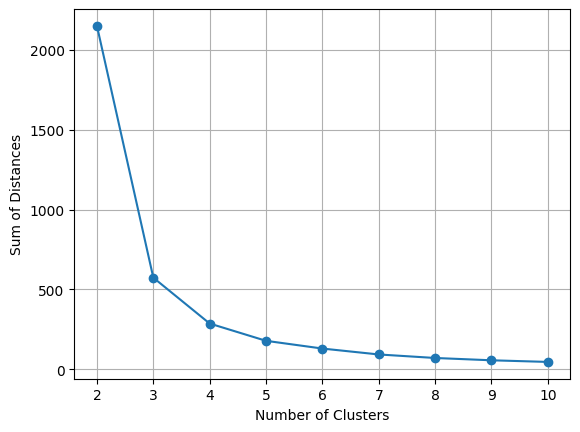

In [ ]:
plt.plot(range(2,11), sum_of_diatances, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Distances')
plt.grid(True)

In [ ]:
model = KMeans(n_clusters=4)
group_number = model.fit_predict(pixels)

In [ ]:
segmented_image = model.cluster_centers_[group_number].reshape(h,w)

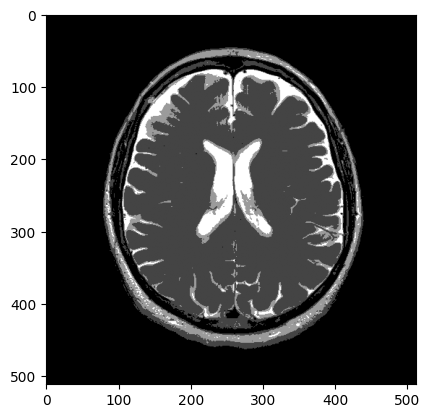

In [ ]:
plt.imshow(segmented_image, cmap='grey')

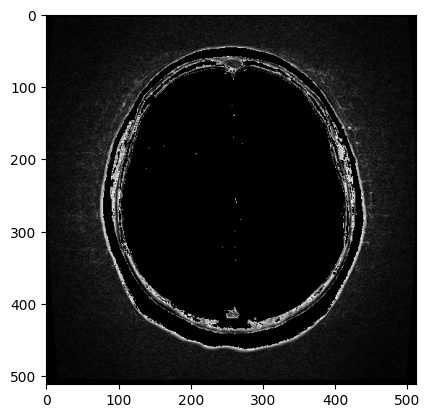

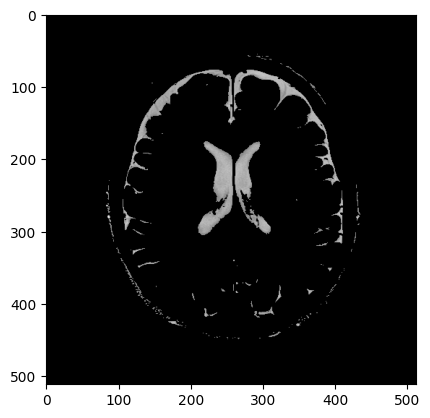

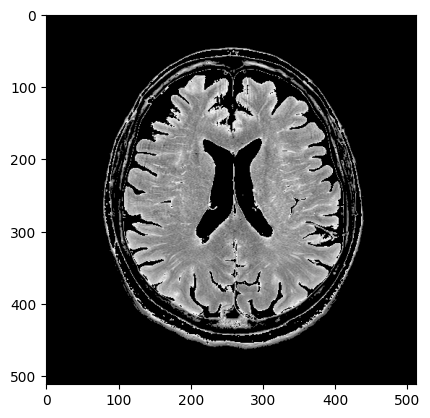

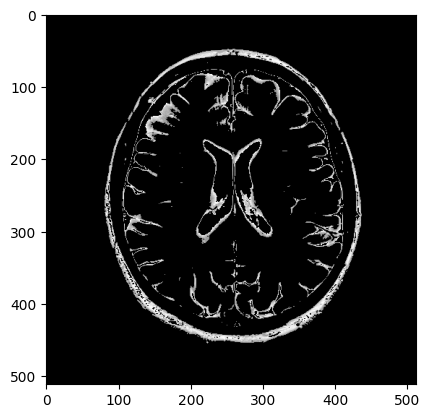

In [ ]:
for i in range(4):
    cluster_mask = group_number.reshape(h,w)==i
    segment = img_array * cluster_mask

    plt.figure()
    plt.imshow(segment, cmap='grey')